In [2]:
import numpy, pandas, matplotlib, yfinance, scipy
print("Libraries imported successfully!")

Libraries imported successfully!


#Day 1: Numpy and sciPy Basics
Initial quant finance tasks: random matrix with NumPy, normal distribution fit with SciPy

Matrix Mean: 0.501486, Std Dev: 0.290163


Matplotlib is building the font cache; this may take a moment.


Fitted Mean: 0.027680, Fitted Std Dev: 0.992032


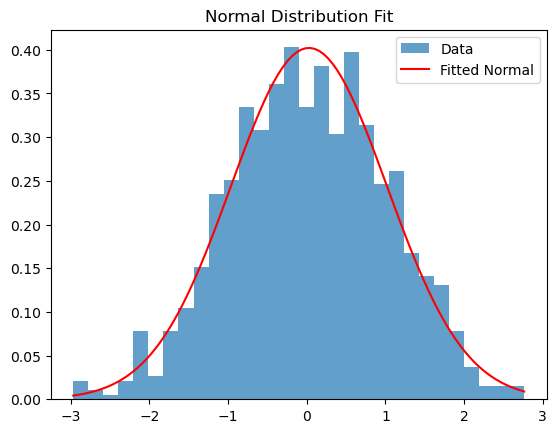

In [4]:
import numpy as np
matrix = np.random.rand(50, 50) # 50x50 matrix, valurs in [0,1)
mean = np.mean(matrix)
std_dev = np.std(matrix)
print(f"Matrix Mean: {mean:.6f}, Std Dev: {std_dev:6f}")

from scipy import stats
import matplotlib.pyplot as plt
data = stats.norm. rvs(loc=0, scale=1, size=1000) # 1000 samples, N(0,1)
mu, sigma = stats.norm.fit(data) # Fit normal distribution
print(f"Fitted Mean: {mu:.6f}, Fitted Std Dev: {sigma:.6f}")
plt.hist(data, bins=30, density =True, alpha=0.7, label="Data")
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("Normal Distribution Fit")
plt.legend()
plt.show()


# Random Variables Notes
- Random variable: Represents random process outcomes (e.g., coin toss result).
- Discrete: Countable values (e.g., 0 or 1).
- Continuous: Range of values (e.g., stock returns).
- Expected value: Probability-weighted average e.g., coin toss (0.5*0 + 0.5*1 = 0.5)

In [5]:
from scipy import stats
import numpy as np
coin_tosses = stats.bernoulli.rvs(p=0.5, size=1000) # 1000 coin tosses
mean_tosses = np.mean(coin_tosses)
print(f"Simulated Coin Toss Mean: {mean_tosses:.6f}") # ~0.5

Simulated Coin Toss Mean: 0.511000


"#Random Variables: Expected Value".
